In [75]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [76]:
df = datasets.fashion_mnist

In [77]:
(X_train, y_train),(X_test, y_test) = df.load_data()

In [78]:
X_train.shape

(60000, 28, 28)

In [79]:
y_train.shape

(60000,)

In [80]:
X_test.shape

(10000, 28, 28)

In [81]:
y_test.shape

(10000,)

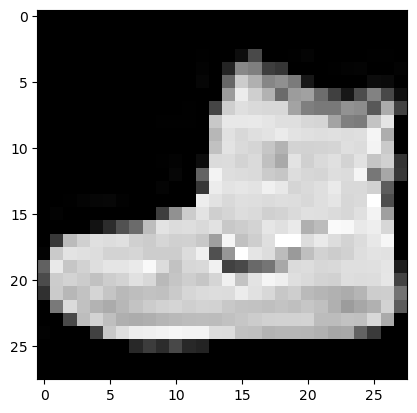

In [82]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

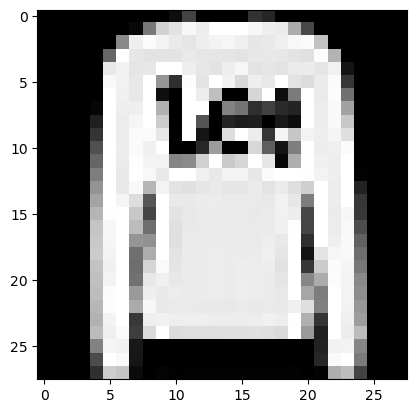

In [86]:
plt.imshow(X_test[1], cmap = 'gray')
plt.show()

In [89]:
X_train ,  X_test = X_train/255 , X_test/255

In [90]:
y_train[0]

9

In [91]:
X_train = X_train.reshape((X_train.shape[0], 28,28,1))

In [92]:
X_test[0].shape

(28, 28)

In [93]:
X_test.shape

(10000, 28, 28)

In [94]:
X_test = X_test.reshape((X_test.shape[0], 28,28,1))

In [95]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [96]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [97]:
history = model.fit(X_train, y_train, epochs= 10, validation_data = (X_test , y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4839 - accuracy: 0.8228 - val_loss: 0.3765 - val_accuracy: 0.8626
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3162 - accuracy: 0.8845 - val_loss: 0.3236 - val_accuracy: 0.8825
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2718 - accuracy: 0.9002 - val_loss: 0.2930 - val_accuracy: 0.8964
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2416 - accuracy: 0.9116 - val_loss: 0.2748 - val_accuracy: 0.9000
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2172 - accuracy: 0.9196 - val_loss: 0.2754 - val_accuracy: 0.9015
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1981 - accuracy: 0.9270 - val_loss: 0.2720 - val_accuracy: 0.9007
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1802 - accuracy: 0.9330 - val_loss: 0.2741 - val_ac

In [98]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3026 - accuracy: 0.9042 - 1s/epoch - 3ms/step

Test accuracy: 0.90420001745224


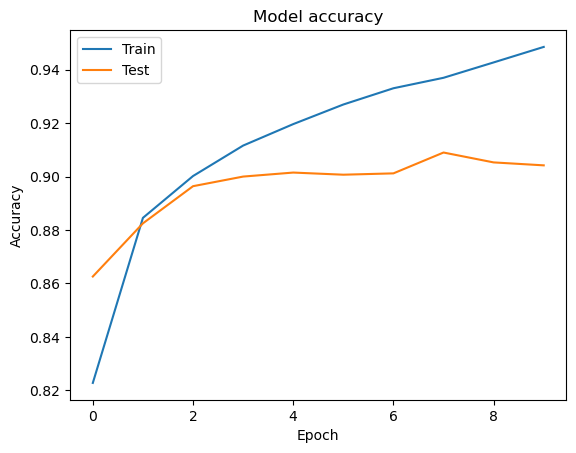

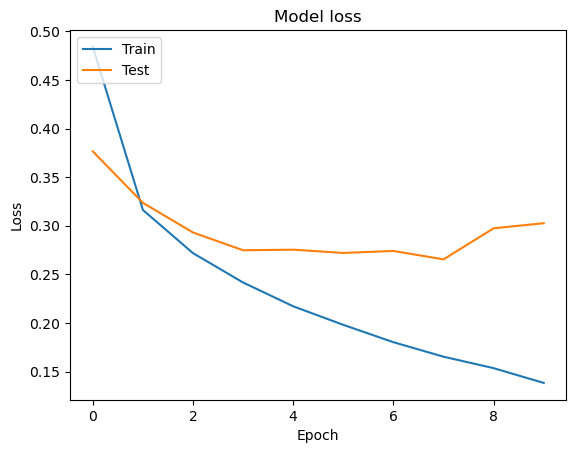

In [99]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [100]:
model.save('trained_fashion_mnist_model.h5')

C:\Users\Nikita\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
